In [1]:
import os

def excel_writer(file_name, sheetname, df):
    """
    参数:
    file_name : 存储df的excel文件名
    sheetname ：excel文件中用于存df的那个sheet的名字
    df        : 要写入excel的dataframe
    """
    if not os.path.exists(file_name):
        writer = pd.ExcelWriter(file_name)
    else:
        writer = pd.ExcelWriter(file_name, mode='a', engine="openpyxl")
    df.to_excel(writer, sheet_name=sheetname, encoding='gbk', index=False)
    writer.save()
    print('DataFrame is written successfully to the Excel File.')


In [2]:
import numpy as np
import networkx as nx
import random
import warnings
import matplotlib.pyplot as plt
import pandas as pd

#解决中文显示问题
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
warnings.filterwarnings("ignore")


In [3]:
"""准备公式"""
def get_mt(ticks):
    '''parm1:当前ticks'''
    '''parm2:sizeof辟谣规模'''
    '''return:辟谣影响规模'''
    if ticks<tau:
        return 0
    return m

'''susceptible'''
def get_p03(n_3):
    '''parm1:邻居节点muzzled数量'''
    '''parm2:邻居节点rumor数量'''
    '''return:被rumor影响的概率'''
    return 1- ((1-q_03)**n_3)

def get_p01(ticks,n_1):
    '''parm1:当前ticks'''
    '''parm2:邻居节点rebuttal-infected数量'''
    '''return:被辟谣影响的概率'''
    mt = get_mt(ticks)
    return 1 - (1-mt)* ((1-q_01)**n_1)

def get_alpha(ticks,n_1,n_3):
    '''return:比重'''
    if (get_p03(n_3)==0) and (get_p01(ticks,n_1)==0):
        return 0
    return get_p03(n_3)/(get_p03(n_3) + get_p01(ticks,n_1))

'''rumor'''
def get_p31(ticks,n_1):
    ''':param1 邻居节点rebuttal-infected数量'''
    ''':return 节点被rebuttal-infected影响的概率'''
    mt = get_mt(ticks)
    return 1-(1-mt)*((1-q_31)**n_1)

def get_p32(n_3):
    ''':param1 邻居节点muzzled数量'''
    ''':return 被muzzled影响的概率'''
    return 1-((1-q_33)**n_3)

def get_beta(ticks,n_1,n_3):
    ''':return 比重'''
    if (get_p32(n_3)==0 and get_p31(ticks,n_1) == 0):
        return 0
    return get_p32(n_3)/(get_p32(n_3)+get_p31(ticks,n_1))

'''muzzled'''
def get_p21(ticks,n_1):
    ''':return 被rebutta-infected影响的概率'''
    mt = get_mt(ticks)
    return 1-(1-mt)*((1-q_21)**n_1)

def get_p23(n_3):
    ''':return  被rumor影响概率'''
    return  1-(1-q_23)**n_3

def get_gamma(ticks,n_1,n_3):
    ''':return 比重'''
    if (get_p23(n_3)==0 and get_p21(ticks,n_1) == 0):
        return 0
    return get_p23(n_3)/(get_p23(n_3)+get_p21(ticks,n_1))


In [4]:
"""计算公式"""
'''susceptible'''
def get_0to3(ticks, n_1,n_3):
    '''return:易感成为rumor-infected概率'''
    return get_p03(n_3) * (1 - get_p01(ticks, n_1)) + get_alpha(ticks, n_1, n_3) * get_p03(n_3) * get_p01(ticks, n_1)

def get_0to1(ticks, n_1, n_3):
    '''return:易感成为rebuttal-infected概率'''
    if (get_p03(n_3)==0 and get_p01(ticks,n_1)==0):
        return get_p01(ticks, n_1) * (1 - get_p03(n_3))
    return get_p01(ticks, n_1) * (1 - get_p03(n_3)) + (1 - get_alpha(ticks, n_1, n_3)) * get_p03(n_3) * get_p01(ticks, n_1)

'''rumor'''
def get_3to2(ticks,n_1,n_3):
    ''':return  rumor成为muzzled的概率'''
    return get_p32(n_3)*(1-get_p31(ticks,n_1)) + get_beta(ticks,n_1,n_3)*get_p32(n_3)*get_p31(ticks,n_1)

def get_3to1(ticks,n_1,n_3):
    ''':return rumor成为rebuttal-infected概率'''
    if (get_p32(n_3)==0 and get_p31(ticks,n_1) == 0):
        return (1-get_p32(n_3))*get_p31(ticks,n_1)
    return (1-get_p32(n_3))*get_p31(ticks,n_1) + (1-get_beta(ticks,n_1,n_3))*get_p32(n_3)*get_p31(ticks,n_1)

'''muzzled'''
def get_2to3(ticks,n_1,n_3):
    ''':return muzzled 成为 rumor 概率'''
    return get_p23(n_3)*(1-get_p21(ticks,n_1)) + get_gamma(ticks,n_1,n_3)*get_p23(n_3)*get_p21(ticks,n_1)

def get_2to1(ticks,n_1,n_3):
    ''':return muzzled 成为 rebuttal-infected概率'''
    if  (get_p23(n_3)==0 and get_p21(ticks,n_1) == 0):
        return  (1-get_p23(n_3))*get_p21(ticks,n_1)
    return (1-get_p23(n_3))*get_p21(ticks,n_1) + (1-get_gamma(ticks,n_1,n_3))*get_p23(n_3)*get_p21(ticks,n_1)



In [5]:

'''---------------------------------执行函数---------------------------------------------'''
def get_forget_rate(ticks, lamda, theta):
    '''parm1:t ticks'''
    '''parm2:遗忘系数'''
    '''parm3:theta ticks后rebuttal开始遗忘'''
    '''return:辟谣开始theta ticks后遗忘概率'''
    if (ticks - tau) > theta:
        return 1-np.exp(-0.1* lamda * (ticks - tau - theta))
    return 0

def get_neighbors_state(graph,node):
    num_Rebuttal_infected = 0
    num_muzzled = 0
    num_Rumor_infected = 0
    for temp in list(graph.neighbors(node)):
        if graph.nodes[temp]['status']== 'Rebuttal-infected':
            num_Rebuttal_infected+=1
        elif graph.nodes[temp]['status'] == 'muzzled':
            num_muzzled+=1
        elif graph.nodes[temp]['status'] == 'Rumor-infected':
            num_Rumor_infected +=1
    return num_Rebuttal_infected,num_muzzled,num_Rumor_infected


def update_node_status(graph, node, ticks):
    """
    更新节点状态
    :param graph: 网络图
    :param node: 节点序数
    """
    n_1, n_2, n_3 = get_neighbors_state(graph, node)
    if graph.nodes[node]['status'] == 'Susceptible':
        p = random.random()
        if p < get_0to3(ticks, n_1, n_3):
            # Susceptible到Rumor-infected
            graph.nodes[node]['status'] = 'Rumor-infected'
        elif p < get_0to3(ticks, n_1, n_3) + get_0to1(ticks, n_1, n_3):
            # Susceptible到Rebuttal-infected
            graph.nodes[node]['status'] = 'Rebuttal-infected'

    # muzzled
    elif graph.nodes[node]['status'] == 'muzzled':
        if(graph.nodes[node]['term'] ==0):
            p = random.random()
            if p < get_2to1(ticks, n_1, n_3):
                graph.nodes[node]['status'] = 'Rebuttal-infected'
            elif p < get_2to1(ticks, n_1, n_3) + get_2to3(ticks, n_1, n_3):
                graph.nodes[node]['status'] = 'Rumor-infected'
        else:
            graph.nodes[node]['term'] -= 1

    # Rumor-infected
    elif graph.nodes[node]['status'] == 'Rumor-infected':
        p = random.random()
        if p < get_3to1(ticks, n_1,n_3):
            graph.nodes[node]['status'] = 'Rebuttal-infected'
        elif p < get_3to1(ticks, n_1,n_3) + get_3to2(ticks,n_1,n_3):
            graph.nodes[node]['status'] = 'muzzled'

    return


def init_graph(graph, rumor_p):
    '''初始化图节点数据'''
    N = graph.number_of_nodes()
    nnode = int(N * rumor_p)

    for node in graph:
        graph.nodes[node]['status'] = 'Susceptible'
        graph.nodes[node]['term'] = freezedays

    for i in range(0, nnode):
        while (1):
            randn = random.randint(0, N - 1)
            if (graph.nodes[randn]['status'] == 'Susceptible'):
                graph.nodes[randn]['status'] = 'Rumor-infected'
                break
    return graph


def quit_iterator(ticks,graph):
    '''两种状态以一定概率退出系统'''
    for node in graph:
        if graph.nodes[node]['status'] == 'Rebuttal-infected':
            p = random.random()
            # rate = get_forget_rate(ticks,lamda,theta)
            # print(f'p:{p},forget_rate{rate}\n')
            if p < get_forget_rate(ticks,lamda,theta):
                graph.nodes[node]['status'] = 'Rebuttal-removed'
        elif graph.nodes[node]['status'] == 'muzzled':
            p = random.random()
            if p < get_forget_rate(ticks,lamda,theta):
                graph.nodes[node]['status'] = 'muzzled-removed'


def count_node(graph):
    """
    计算当前图内各个状态节点的数目
    :param graph: 输入图
    :return: 各个状态的节点数目
    """
    num_Rebuttal_infected = 0
    num_muzzled = 0
    num_Rumor_infected = 0

    num_R1_removed = 0
    num_R2_removed = 0


    for node in graph:
        if graph.nodes[node]['status'] == 'Rebuttal-infected':
            num_Rebuttal_infected += 1
        elif graph.nodes[node]['status'] == 'muzzled':
            num_muzzled += 1
        elif graph.nodes[node]['status'] == 'Rumor-infected':
            num_Rumor_infected += 1
        elif graph.nodes[node]['status'] == 'Rebuttal-removed':
            num_R1_removed += 1
        elif graph.nodes[node]['status'] == 'muzzled-removed':
            num_R2_removed += 1
    return num_Rebuttal_infected, num_muzzled, num_Rumor_infected, num_R1_removed, num_R2_removed,


def update_network(graph, ticks):
    for node in graph:
        update_node_status(graph, node, ticks)  # 针对node号节点进行SIR过程
    quit_iterator(ticks,graph)

def ticks_rounds_update(graph,ticks):
    max_n1=0
    max_n2=0
    mygraph = init_graph(graph,rumor_p)
    for t in range(1,ticks+1):
        update_network(mygraph, t)
        n_1,n_2,n_3,re_n_1, re_n_2, = count_node(graph)  # 得到本次迭代结束后各个状态（S、I、R）的节点数目
        if(n_1>max_n1):
            max_n1=n_1
        if(n_2>max_n2):
            max_n2=n_2
    n = graph.number_of_nodes()
    
    return max_n1/n, max_n2/n

In [6]:
def rounds_100(graph,ticks):
    ITERA =60
    result_n1 = 0
    result_n2 = 0
    for i in range(ITERA):
        n1,n2= ticks_rounds_update(graph,ticks)
        result_n1+=n1
        result_n2+=n2
    return result_n1/ITERA,result_n2/ITERA
        

In [7]:
'''freeze不能对别人产生影响'''
'''禁言有可能导致谣言传播周期变长？'''
'''对比每个freezedays下的rumor变化'''
'''对比每个freezedays下的rebuttal变化'''
'''辟谣时间点、遗忘开始时间点、freezedays等因素下rumor和rebuttal峰值变化'''

samevalue = 0.05
q_01=samevalue
#q_02=samevalue*3
q_03=samevalue*3
q_23=samevalue
q_31=samevalue
q_32=samevalue
q_33=samevalue
q_21=samevalue
freezedays=1

tau=0   #辟谣时间点
ticks = 50
m = 0.02 #影响规模
num_nodes = 1000
rumor_p = 0.01 
lamda =0.05 #遗忘率
theta =0 #在辟谣后theta个ticks后遗忘开始

In [8]:
init_G = nx.complete_graph(11)
Barabasi_G = nx.barabasi_albert_graph(n=num_nodes, m=5, seed = 128, initial_graph = init_G)#无标度网络
graph = nx.convert_node_labels_to_integers(Barabasi_G, first_label=0, ordering='default', label_attribute=None)

In [13]:
list_tau = [1,2,3,4,5,6,7,8,9,10,11,13,15,18,21]
list_m = [0.01,0.03,0.05,0.1]

list_theta = [0,1,3,5,10]
list_lamda = [0.025,0.05,0.075,0.1]

In [22]:
for theta_val in list_theta:
    theta = theta_val
    for lamda_val in list_lamda:
        lamda = lamda_val
        result_2d_n1 = []
        result_2d_n2 = []
        for m_val in list_m:
            m = m_val
            
            result_n1 = []
            result_n2 = []
            for tau_val in list_tau:
                tau = tau_val
                res1,res2 = rounds_100(graph,ticks)
                result_n1.append(res1) #存储m = n, tau = list_tau的结果
                result_n2.append(res2)
#             print(f'n1:theta={theta},lamda={lamda},m={m},res={result_n1}\n')
#             print(f'n2:theta={theta},lamda={lamda},m={m},res={result_n2}\n')
            result_2d_n1.append(result_n1)
            result_2d_n2.append(result_n2)
        #将result2d数据存储到csv中
        data1=pd.DataFrame(result_2d_n1,index=list_m,columns=list_tau)
        data2=pd.DataFrame(result_2d_n2,index=list_m,columns=list_tau)
        sheet_name1 = '{}-{}-1'.format(theta,lamda)
        sheet_name2 = '{}-{}-2'.format(theta,lamda)
        excel_writer('maxoutput.xlsx',sheet_name1,data1)
        excel_writer('maxoutput.xlsx',sheet_name2,data2)

DataFrame is written successfully to the Excel File.
DataFrame is written successfully to the Excel File.
DataFrame is written successfully to the Excel File.
DataFrame is written successfully to the Excel File.
DataFrame is written successfully to the Excel File.
DataFrame is written successfully to the Excel File.
DataFrame is written successfully to the Excel File.
DataFrame is written successfully to the Excel File.


KeyboardInterrupt: 

In [14]:
#绘图
data_name1 = []
for theta_val in list_theta:
    theta = theta_val
    for lamda_val in list_lamda:
        lamda = lamda_val
        sheet_name = '{}-{}-1'.format(theta,lamda)
        data_name1.append(sheet_name)

In [15]:
data_name1
# theta-lamda

['0-0.025-1',
 '0-0.05-1',
 '0-0.075-1',
 '0-0.1-1',
 '1-0.025-1',
 '1-0.05-1',
 '1-0.075-1',
 '1-0.1-1',
 '3-0.025-1',
 '3-0.05-1',
 '3-0.075-1',
 '3-0.1-1',
 '5-0.025-1',
 '5-0.05-1',
 '5-0.075-1',
 '5-0.1-1',
 '10-0.025-1',
 '10-0.05-1',
 '10-0.075-1',
 '10-0.1-1']

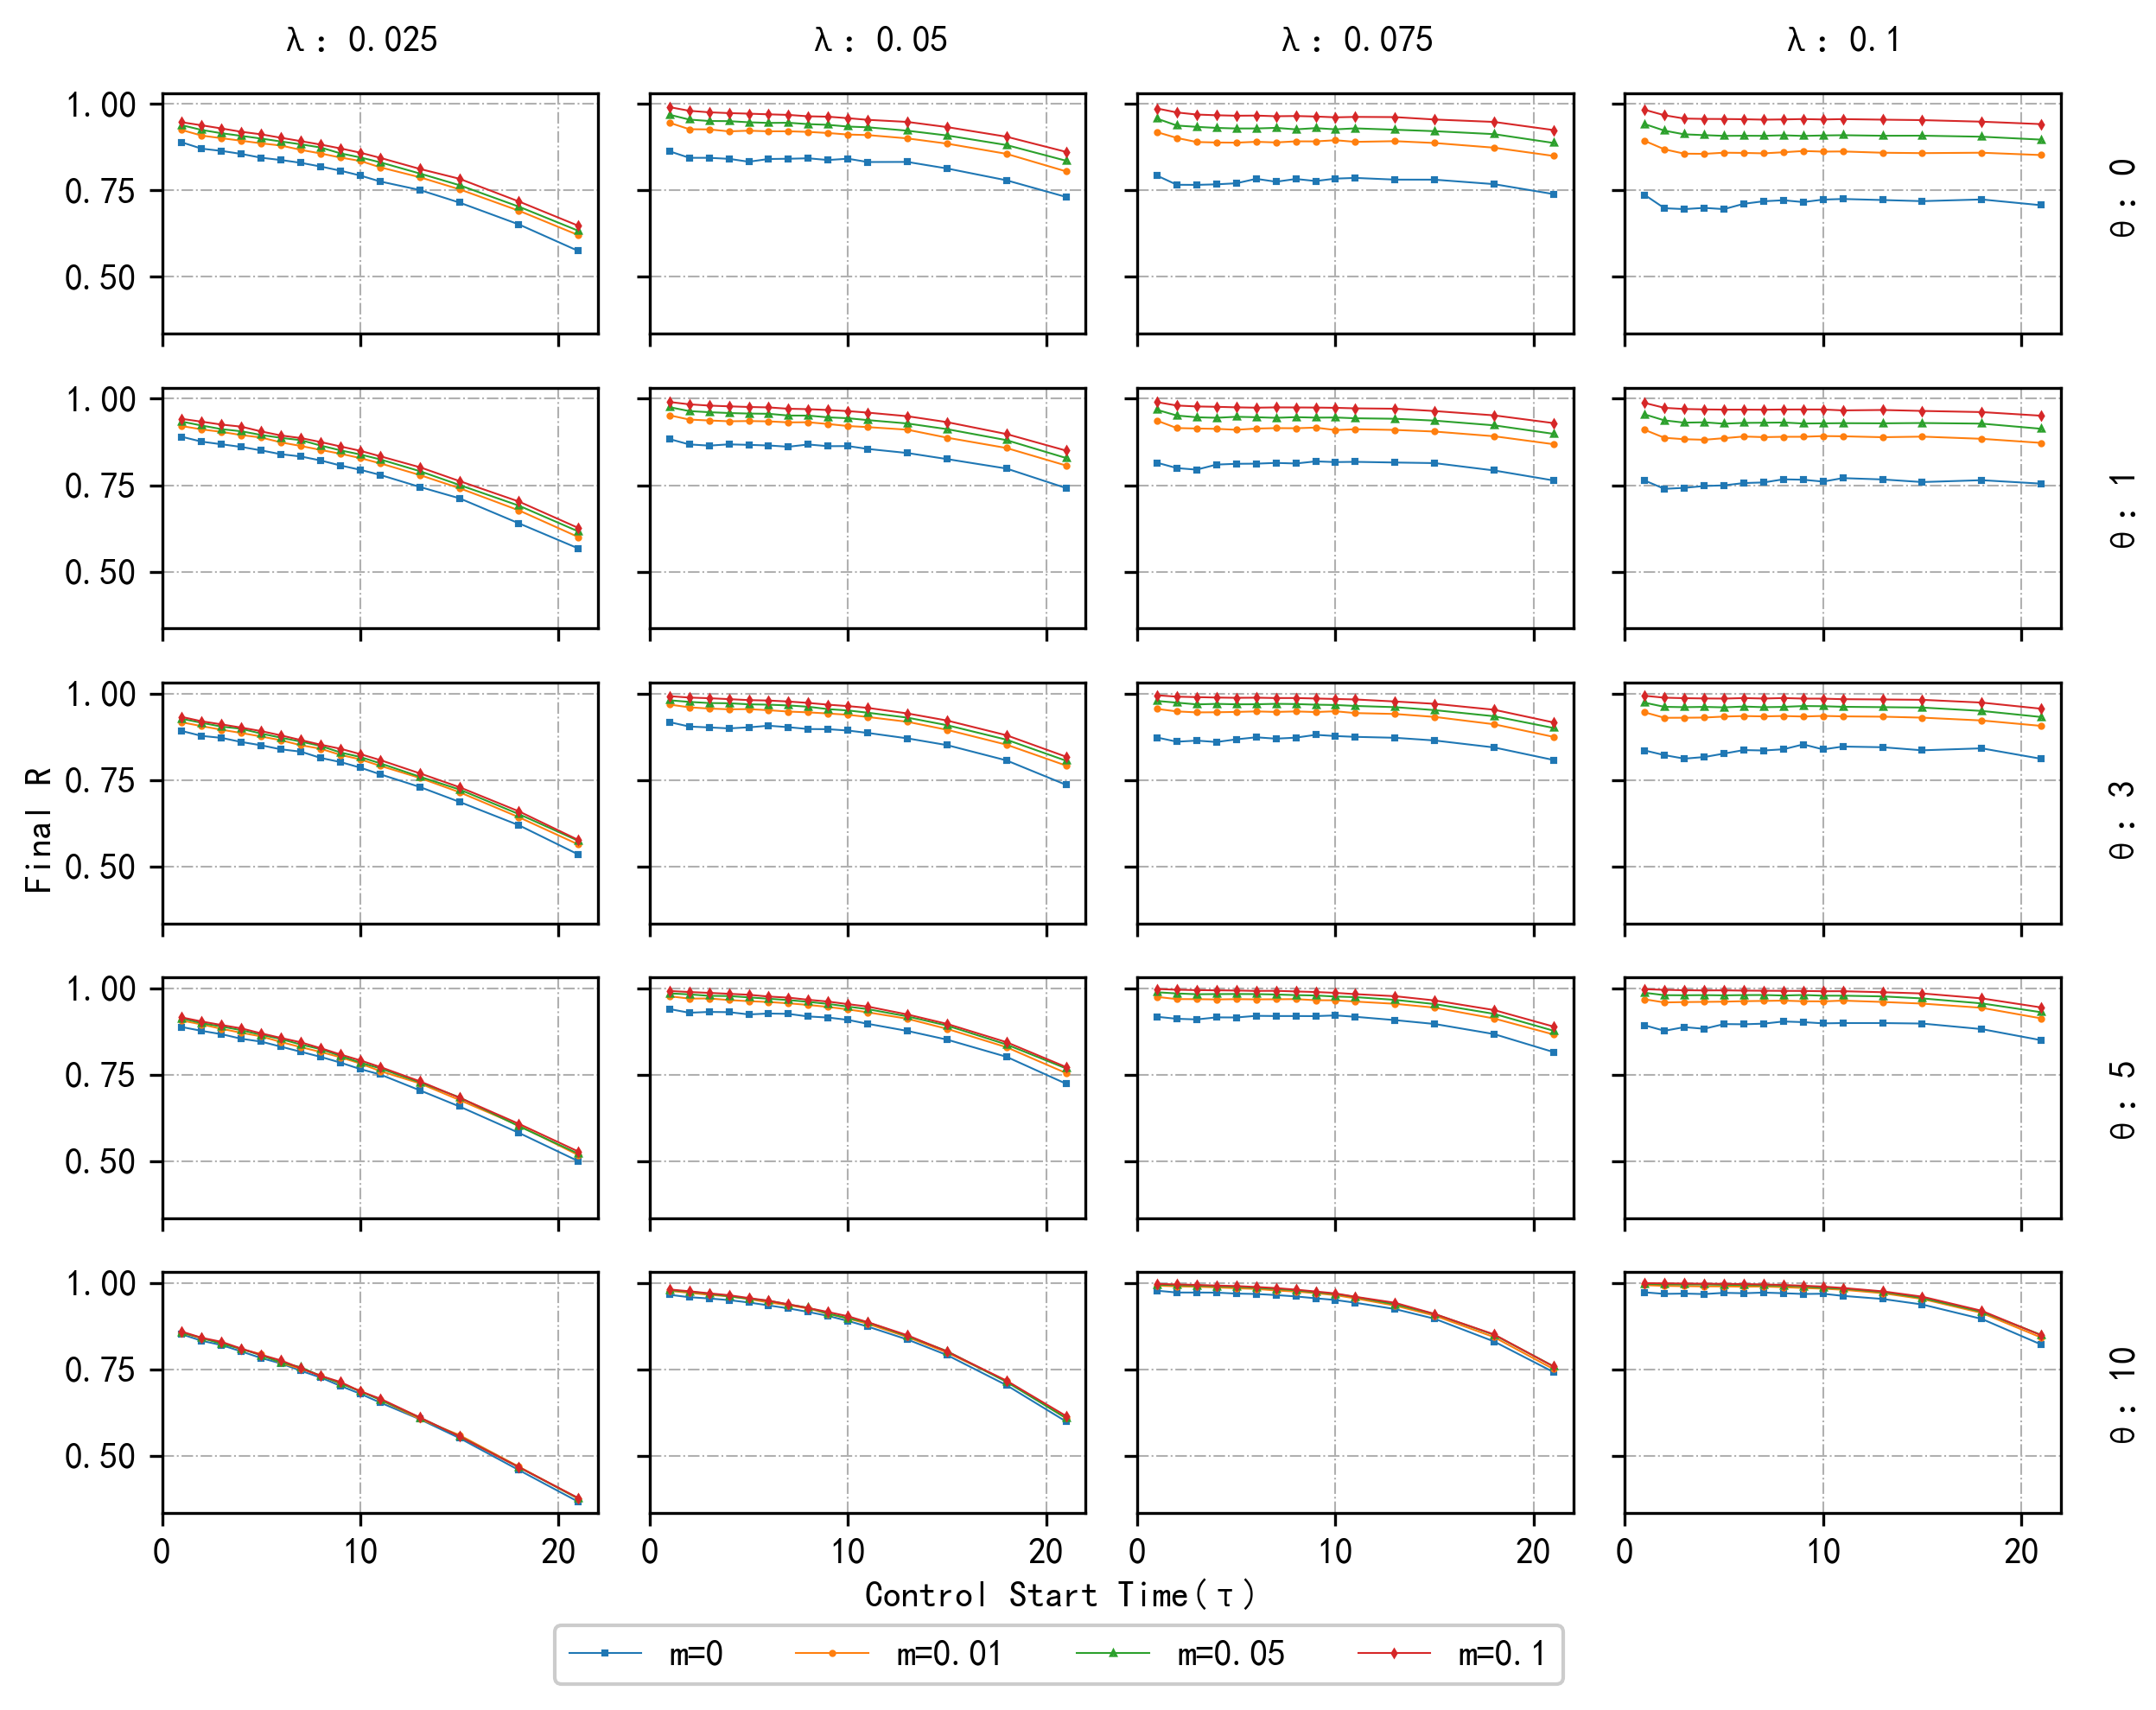

In [23]:
fig, axes = plt.subplots(5, 4, sharex=True, sharey=True, figsize=(8,6),dpi=300)
# xticks=[0,5,10,15,20]
# yticks=[0.00,0.25,0.50,0.75,1.00]

name_index = 0
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        data=pd.read_excel("maxoutput.xlsx",sheet_name=data_name1[name_index])
        line1 = axes[i,j].plot(data.loc[0],marker='s',linestyle='-',linewidth='0.5',markersize='1',label='m=0')
        line2 = axes[i,j].plot(data.loc[1],marker='o',linestyle='-',linewidth='0.5',markersize='1',label='m=0.01')
        line3 = axes[i,j].plot(data.loc[2],marker='^',linestyle='-',linewidth='0.5',markersize='1',label='m=0.05')
        line4 = axes[i,j].plot(data.loc[3],marker='d',linestyle='-',linewidth='0.5',markersize='1',label='m=0.1')
        axes[i,j].grid(zorder=0, linewidth = "0.5", linestyle = "-.")
#         axes[i,j].set_xticks(xticks)
#         axes[i,j].set_yticks(yticks)
        name_index += 1
fig.text(0.5, 0, 'Control Start Time(τ)', ha='center')
fig.text(0, 0.5, 'Max R', va='center', rotation='vertical')

fig.text(0.16,1,'λ：0.025',ha='center')
fig.text(0.41,1,'λ：0.05',ha='center')
fig.text(0.64,1,'λ：0.075',ha='center')
fig.text(0.875,1,'λ：0.1',ha='center')

fig.text(1,0.14,'θ：10',va='center',rotation='vertical')
fig.text(1,0.33,'θ：5',va='center',rotation='vertical')
fig.text(1,0.51,'θ：3',va='center',rotation='vertical')
fig.text(1,0.71,'θ：1',va='center',rotation='vertical')
fig.text(1,0.91,'θ：0',va='center',rotation='vertical')

# 构造图例
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend( lines, labels,bbox_to_anchor=(0.75, 0),ncol=4, framealpha=1)
fig.subplots_adjust(wspace=0.05,hspace=0.05)
fig.tight_layout()
fig.savefig('max-R-res.png',dpi=300,bbox_inches = 'tight')
plt.show()


In [20]:
#绘图
data_name2 = []
for theta_val in list_theta:
    theta = theta_val
    for lamda_val in list_lamda:
        lamda = lamda_val
        sheet_name = '{}-{}-2'.format(theta,lamda)
        data_name2.append(sheet_name)

In [21]:
data_name2
# theta-lamda

['0-0.025-2',
 '0-0.05-2',
 '0-0.075-2',
 '0-0.1-2',
 '1-0.025-2',
 '1-0.05-2',
 '1-0.075-2',
 '1-0.1-2',
 '3-0.025-2',
 '3-0.05-2',
 '3-0.075-2',
 '3-0.1-2',
 '5-0.025-2',
 '5-0.05-2',
 '5-0.075-2',
 '5-0.1-2',
 '10-0.025-2',
 '10-0.05-2',
 '10-0.075-2',
 '10-0.1-2']

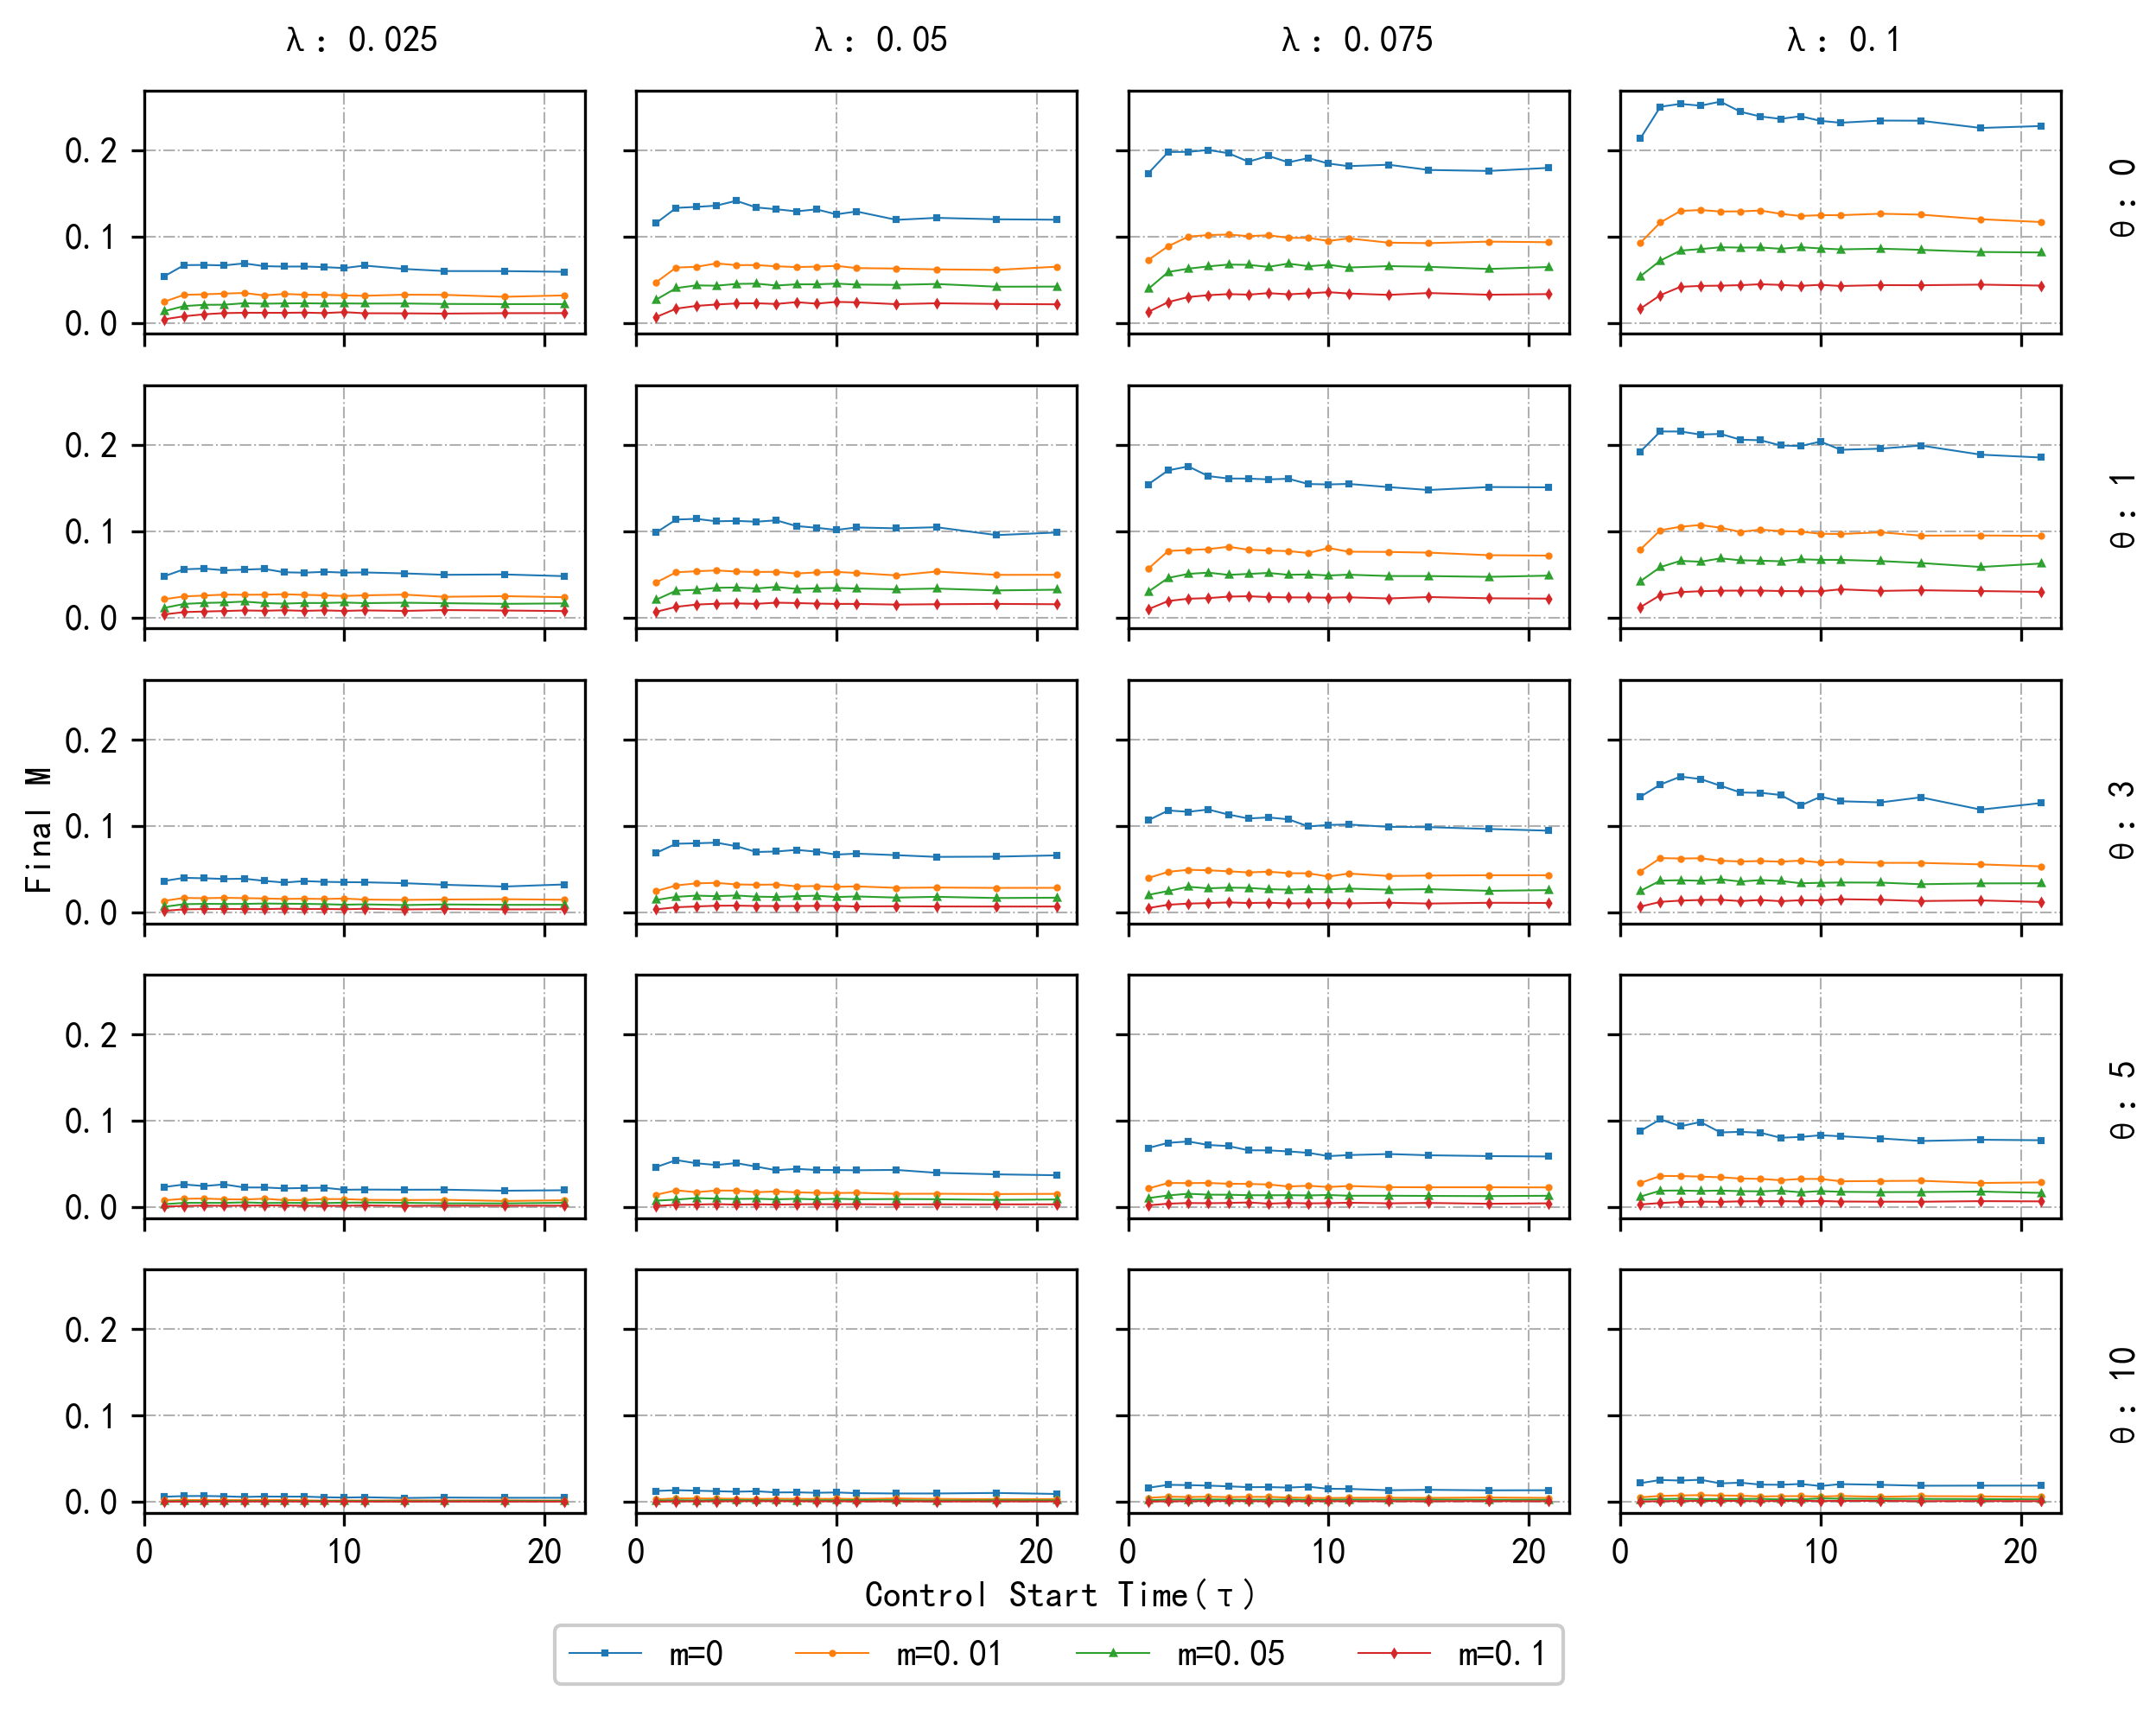

In [24]:
fig, axes = plt.subplots(5, 4, sharex=True, sharey=True, figsize=(8,6),dpi=300)
# xticks=[0,5,10,15,20]
# yticks=[0.00,0.25,0.50,0.75,1.00]

name_index = 0
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        data=pd.read_excel("maxoutput.xlsx",sheet_name=data_name2[name_index])
        line1 = axes[i,j].plot(data.loc[0],marker='s',linestyle='-',linewidth='0.5',markersize='1',label='m=0')
        line2 = axes[i,j].plot(data.loc[1],marker='o',linestyle='-',linewidth='0.5',markersize='1',label='m=0.01')
        line3 = axes[i,j].plot(data.loc[2],marker='^',linestyle='-',linewidth='0.5',markersize='1',label='m=0.05')
        line4 = axes[i,j].plot(data.loc[3],marker='d',linestyle='-',linewidth='0.5',markersize='1',label='m=0.1')
        axes[i,j].grid(zorder=0, linewidth = "0.5", linestyle = "-.")
#         axes[i,j].set_xticks(xticks)
#         axes[i,j].set_yticks(yticks)
        name_index += 1
fig.text(0.5, 0, 'Control Start Time(τ)', ha='center')
fig.text(0, 0.5, 'Max M', va='center', rotation='vertical')

fig.text(0.16,1,'λ：0.025',ha='center')
fig.text(0.41,1,'λ：0.05',ha='center')
fig.text(0.64,1,'λ：0.075',ha='center')
fig.text(0.875,1,'λ：0.1',ha='center')

fig.text(1,0.14,'θ：10',va='center',rotation='vertical')
fig.text(1,0.33,'θ：5',va='center',rotation='vertical')
fig.text(1,0.51,'θ：3',va='center',rotation='vertical')
fig.text(1,0.71,'θ：1',va='center',rotation='vertical')
fig.text(1,0.91,'θ：0',va='center',rotation='vertical')

# 构造图例
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend( lines, labels,bbox_to_anchor=(0.75, 0),ncol=4, framealpha=1)
fig.subplots_adjust(wspace=0.05,hspace=0.05)
fig.tight_layout()
fig.savefig('max-M-res.png',dpi=300,bbox_inches = 'tight')
plt.show()
